## Solving for Rolling Averages using Pandas - Kevin Sun

### Libraries Needed:
- Pandas
- Matplotlib
- datetime

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#read from the csv file
data = pd.read_csv('example.csv')

#don't need index column, so delete it
del data['index']

#since the time is in non-uniform seconds, I converted it into a timestamp data type for future use in a rolling function
data['time'] = pd.to_datetime(data['time'], unit='s') 

#set index to time
data = data.set_index('time')

In [3]:
#what the data looks like right now
data

,value
time,
1970-01-01 00:00:00,0.0
1970-01-01 00:00:01,0.0
1970-01-01 00:00:04,0.0
1970-01-01 00:00:07,0.0
1970-01-01 00:00:08,0.0
...,...
1970-01-01 02:35:31,119.0
1970-01-01 02:35:32,105.0
1970-01-01 02:35:35,80.0


The reason why I needed to convert the time to a timestamp data value was because the rolling function takes in a window size of a certain amount. If I had left it simply as 600 instead of 600s, then it would have counted 600 instances as the window instead of 600 seconds as the window.

In [4]:
#calculates rolling average with 600 seconds as window
data['average'] = data.rolling('600s').mean()

#only counts rolling average when we have enough data
data['average'].loc[data.index < pd.Timestamp(1970, 1, 1, 0, 10)] = None

#converts timestamp back to seconds for graph
data.index = (data.index - dt.datetime(1970,1,1)).total_seconds()

In [5]:
#what the data looks like right now
data

,value,average
time,,
0.0,0.0,NaN
1.0,0.0,NaN
4.0,0.0,NaN
7.0,0.0,NaN
8.0,0.0,NaN
...,...,...
9331.0,119.0,146.411960
9332.0,105.0,146.274834
9335.0,80.0,145.677741


Text(0, 0.5, 'Average')

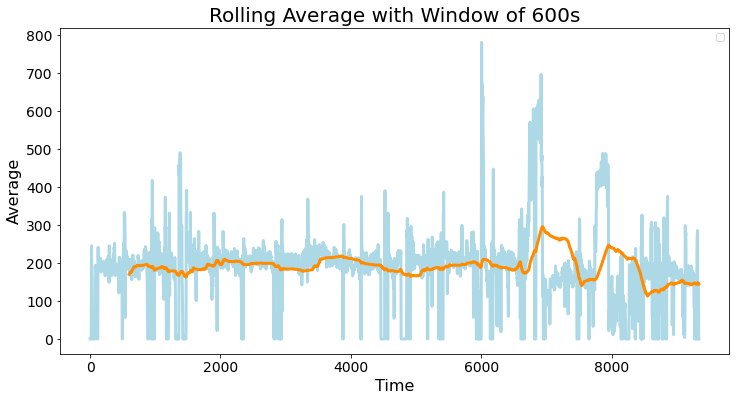

In [6]:
#calculate_rolling_average returns tuple: Max value of avgs, times, values
values = (data['average'].max(), max(data.index.tolist()), data['value'].max())

#line plot
colors = ['lightblue','darkorange']
data.plot(color=colors, linewidth=3, figsize=(12,6))

#modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

#title and labels
plt.title('Rolling Average with Window of 600s', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Average', fontsize=16)

Graph is the same as the example image provided.

In [11]:
#calculate_rolling_average returns tuple: Max value of avgs, times, values
#I was confused on what was meant by times and values, so I simply added the max time and max value into the tuple
values

(295.35313531353137, 9340.0, 780.0)